<a href="https://colab.research.google.com/github/guillermohenrion/AI/blob/master/Reddes_Neuronales_Artificiales_Introducci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccción a las redes neuronales artificiales

Las [redes neuronales artificiales](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-14e5c02bafe) (también conocidas como sistemas conexionistas) son un modelo computacional vagamente inspirado en el comportamiento observado en su homólogo biológico. Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

>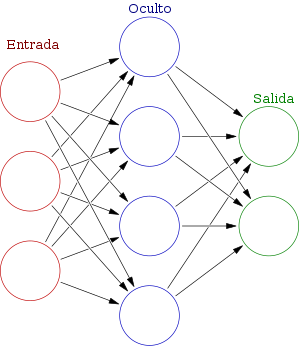


La neurona de [McCulloch-Pitts](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1) es una unidad de cálculo que intenta modelar el comportamiento de una neurona "natural", similares a las que constituyen del cerebro humano. Ella es la unidad esencial con la cual se construye una red neuronal artificial.

El resultado del cálculo en una neurona consiste en realizar una suma ponderada de las entradas, seguida de la aplicación de una función no lineal, como se ilustra en la siguiente figura:

>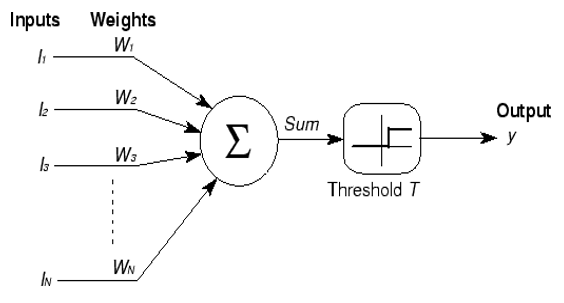

La [teoría Hebbiana](https://es.wikipedia.org/wiki/Teor%C3%ADa_hebbiana) describe un mecanismo básico de plasticidad sináptica en el que el valor de una conexión sináptica se incrementa si las neuronas de ambos lados de dicha sinapsis se activan repetidas veces de forma simultánea. Introducida por Donald Hebb, en 1949, es también llamada regla de Hebb, postulado de aprendizaje de Hebb o Teoría de la Asamblea Celular.

# Cómputo de una neurona

Basados en los conceptos anteriores se modelan las redes de neuronales artificiales.


Una neurona $i$ es una unidad de cómputo que realiza el cálculo siguiente (donde $x_i$ a $x_j$ es la entrada, los $w_{ij}$ son los pesos que ponderan cada entrada de la unidad i, $f$ es la función escalón como vimos anteriormente, $S$ el valor previo a la aplicación de la función $f$ y $O_i$ la salida al cómputo de la unidad $i$):

>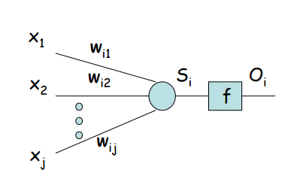

>$S_i=\sum_{j}^{} x_jw_{ij}$
>
>$O_i = 1$ si $S_i>=0$ y $-1$ si $S_i<0$


# Observaciones

1. Puede tanbién existir un valor umbrbal (bias) $\Theta\$ de tal manera que la función quede definida como en el siguiente gráfico:

>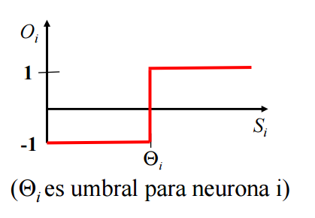

Sería equivalente a considerar un término más de bias al realizar la suma en el cálculo de $S_i$ y considerar la fucnión escalón original, de la siguiente manera

>$S_i=\sum_{j}^{} x_jw_{ij}+b_i$

Y esto es equivalente a tener un input más en -1 con un peso igual al umbral como veremos se calculará en el ejemplo siguiente


2. También la función escalón puece definirse entre 0 y 1



Supongamos que quiero una red que compute la función AND o una función OR de acuerdo a la tabla de verdad de la columna izquierda.

>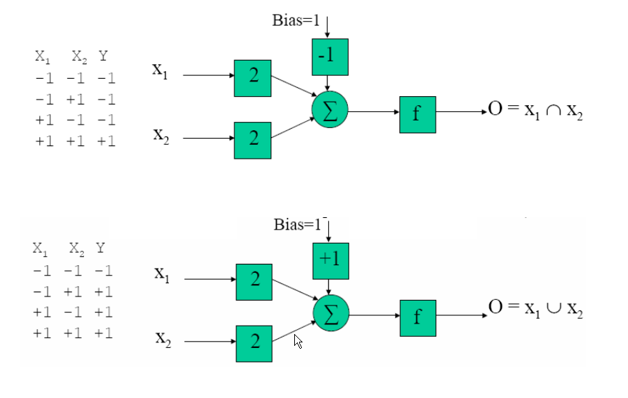


Si se ve bien, el cálculo de la neurona es una hiperplano  calculado en función de la entrada, más un escalón que determina de qué lado del hiperplano está la salida, discriminando linealmente.

>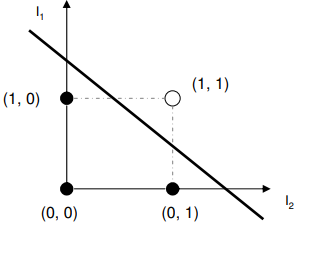


Para la función AND esto sería

In [0]:
import numpy as np
#Función escalón
escalon = lambda x: 1 if x>=0 else -1
#Se agrega el bias como un pesos más en 1 y un input más en -1 para cada entrada
X=np.array([[-1,-1, -1],[-1,1,-1],[1,-1,-1],[1,1,-1]])
Wi=np.array([2,2,1])
#Producto de X por Wi
Si=np.dot(X,Wi)
#Aplico función escalón a cada elemento de Si
Y=list(map(escalon, Si))
#Obtengo el resultado correcto
print(Y)

[-1, -1, -1, 1]


Esto se puede hacer porque el AND es linealmente separable, no sucede lo mismo con la función [XOR](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182)

>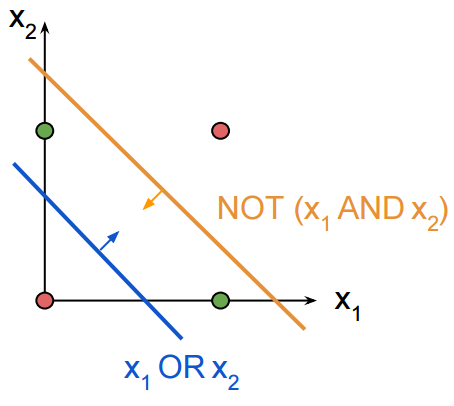

Necesitamos para resolver esto la inreacción de más unidades de procesamiento (neuronas), interconexionadas, en donde el input de una sea la salida de la anterior (el umbral está puesto en este ejemplo dentro del nodo). En el ejemplo hay una capa intermedia entre la capa de entrada y la de salida, de 3 unidades o neuronas.


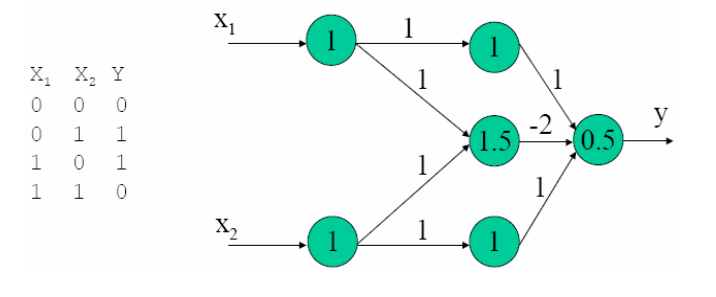

In [7]:
import numpy as np
#Función escalón
escalon = lambda x: 1 if x>=0 else -1
#Se agrega el bias como un pesos más en 1 y un input más en -1 para cada entrada
X=np.array([[-1,-1, -1],[-1,1,-1],[1,-1,-1],[1,1,-1]])
Wi=np.array([2,2,1])
#Producto de X por Wi
Si=np.dot(X,Wi)
#Aplico función escalón a cada elemento de Si
Y=list(map(escalon, Si))
#Obtengo el resultado correcto
print(Y)

[-1, -1, -1, 1]


Hasta ahora hemos puesto los pesos de las inteconexiones de manera que la función respondiera a la respuesta de la misma, en donde tenemos que podemos tener la respuesta de todos los valores y estas son pocas. Pero la red no está aprendiendo los valores de los pesos correctos, simeplemente los elegimos manualmenete. También elegimos la arquitectura de la red (si bien los nodos de entrada y de salida son concidos, la arquitectura podría tomar muchas formas).

#  Perceptrones y perceptrones multicapas

Con la misma arquitectura y forma de cálculo,  [Frank Rosenblatt](https://es.wikipedia.org/wiki/Frank_Rosenblatt) propone el [perceptron](https://towardsdatascience.com/perceptron-the-artificial-neuron-4d8c70d5cc8d), en donde se define una regla de [aprendizaje](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975).

Si tenemos una sola neurona, la regla de aprendizaje de actualización de pesos es el que sigue:

* $w_j$ = $w_j$+$\alpha$($\delta$-y)$x_j$

donde:

* $X_j$ denota el elemento en la posición {\displaystyle j}j en el vector de la entrada
* $W_j$ el elemento en la posición {\displaystyle j}j en el vector de peso
* $y$ denota la salida de la neurona
* $\delta$ denota la salida esperada
* $\alpha$  es una constante tal que 0 < $\alpha$ <= 1


Utilizando esta regla se define un algoritmo de aprendizaje, iterativo, en donde la regla se aplica con cada uno de las entradas (probablemente tomados al azar) hasta conseguir convergencia. 

El aprendizaje para la función NOT AND (en donde a diferencia del ejemplo anterior ahora el FALSE se interpreta como 0 en lugar de -1) es el siguiente, en donde se imprime la distintas iteraciones hasta encontrar los pesos en donde cada respuesta sea correcta.



In [6]:
umbral = 0.5

tasa_de_aprendizaje = 0.1
pesos = [0, 0, 0]
conjunto_de_entrenamiento = [((1, 0, 0), 1), ((1, 0, 1), 1), ((1, 1, 0), 1), ((1, 1, 1), 0)]

def producto_punto(valores, pesos):
    return sum(valor * peso for valor, peso in zip(valores, pesos))

while True:
    print('-' * 60)
    contador_de_errores = 0
    for vector_de_entrada, salida_deseada in conjunto_de_entrenamiento:
        print(pesos)
        resultado = producto_punto(vector_de_entrada, pesos) > umbral
        error = salida_deseada - resultado
        if error != 0:
            contador_de_errores += 1
            for indice, valor in enumerate(vector_de_entrada):
                pesos[indice] += tasa_de_aprendizaje * error * valor
    if contador_de_errores == 0:
        break

------------------------------------------------------------
[0, 0, 0]
[0.1, 0.0, 0.0]
[0.2, 0.0, 0.1]
[0.30000000000000004, 0.1, 0.1]
------------------------------------------------------------
[0.30000000000000004, 0.1, 0.1]
[0.4, 0.1, 0.1]
[0.5, 0.1, 0.2]
[0.5, 0.1, 0.2]
------------------------------------------------------------
[0.4, 0.0, 0.1]
[0.5, 0.0, 0.1]
[0.5, 0.0, 0.1]
[0.6, 0.1, 0.1]
------------------------------------------------------------
[0.5, 0.0, 0.0]
[0.6, 0.0, 0.0]
[0.6, 0.0, 0.0]
[0.6, 0.0, 0.0]
------------------------------------------------------------
[0.5, -0.1, -0.1]
[0.6, -0.1, -0.1]
[0.7, -0.1, 0.0]
[0.7, -0.1, 0.0]
------------------------------------------------------------
[0.6, -0.2, -0.1]
[0.6, -0.2, -0.1]
[0.7, -0.2, 0.0]
[0.7999999999999999, -0.1, 0.0]
------------------------------------------------------------
[0.7, -0.2, -0.1]
[0.7, -0.2, -0.1]
[0.7, -0.2, -0.1]
[0.7999999999999999, -0.1, -0.1]
-------------------------------------------------

Para casos más complejos en donde tengamos muchoas ejemplos con su respuesta, se puede tomar un conjunto de entrenamiento y de validación, y el algorimto se detendrá ante un nivel estipulado de error.

De forma similar, se puede establecer un algoritmo de aprendizaje para arquitecturas de [perceptrones multicapas](https://towardsdatascience.com/multi-layer-perceptron-using-tensorflow-9f3e218a4809)   